<h1><b>Metro Train DataSet</b></h1> <br>

Team ID : T17 <br>
Arnish Satasiya : 202001031 <br>
Jay Kuvadiya : 202001042 <br>
Jenish Mangukiya : 202001176 <br>
Aastha Shetty : 202001260 <br>
Deep Kanani : 202001454 <br>


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from time import time
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# **Loading Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MetroPT3(AirCompressor).csv")

# **EDA**

In [ ]:
df.shape

(1516948, 17)

In [ ]:
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
df.tail()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516947,15169470,2020-09-01 03:59:50,-0.014,8.860,8.848,-0.022,8.864,59.475,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [ ]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

# **Data Preprocessing**

**1. Removing "Unnamed: 0" column because it contains redundant data**


In [ ]:
df.drop(['Unnamed: 0'], axis=1 , inplace = True)

In [ ]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


**2. Z-score normalization for analogue sensors**

In [ ]:
analogue_sensors = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Motor_current', 'Oil_temperature']
df[analogue_sensors] = stats.zscore(df[analogue_sensors])

In [ ]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.424441,0.584247,0.531575,-0.20909,0.583993,-1.387941,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.425056,0.568600,0.529175,-0.20386,0.568326,-1.376431,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.424441,0.552953,0.526175,-0.20386,0.552660,-1.387941,-0.872122,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.424441,0.537306,0.523175,-0.20386,0.536993,-1.414797,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.424441,0.521659,0.520175,-0.20386,0.521327,-1.407124,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


# **Data Visualization**

**1. Heatmap**

<ipython-input-15-a9a9a2ab9164>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')


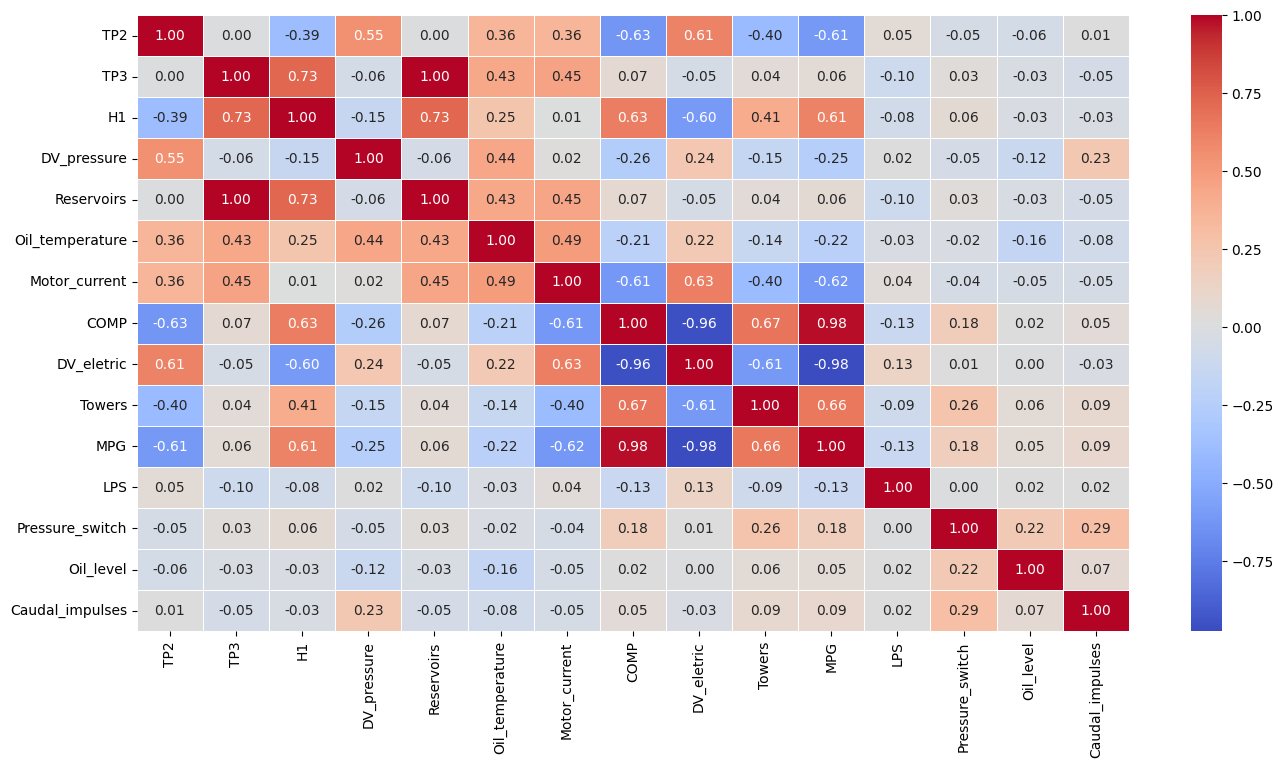

In [ ]:
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

This heatmap illustrates the strength of correlations between all parameters, ranging from 0 (no correlation) to 1 (perfect correlation), providing a clear visual indication of the degree to which variables are related.

**2. Time series plot**

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

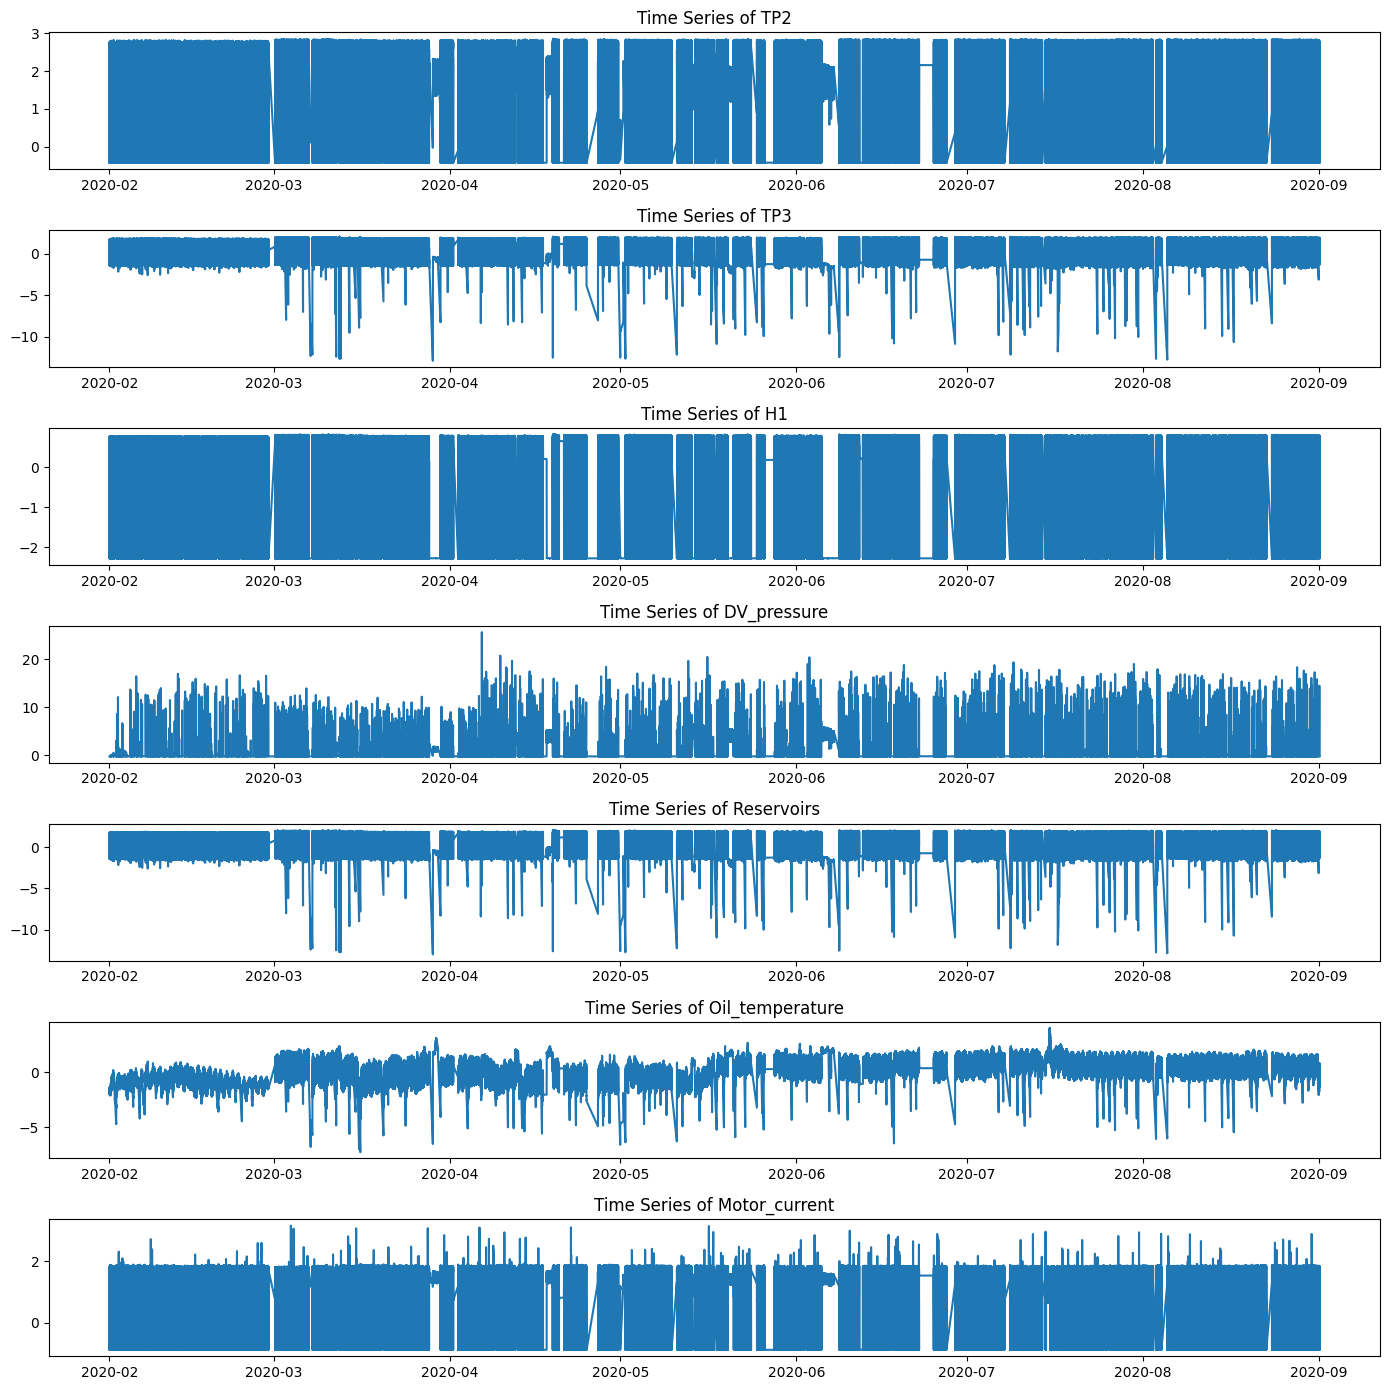

In [ ]:
# Plot the time series for 'TP2', 'TP3', and 'H1'
plt.figure(figsize=(14, 14))

plt.subplot(7, 1, 1)
plt.plot(df['timestamp'], df['TP2'])
plt.title('Time Series of TP2')

plt.subplot(7, 1, 2)
plt.plot(df['timestamp'], df['TP3'])
plt.title('Time Series of TP3')

plt.subplot(7, 1, 3)
plt.plot(df['timestamp'], df['H1'])
plt.title('Time Series of H1')

plt.subplot(7, 1, 4)
plt.plot(df['timestamp'], df['DV_pressure'])
plt.title('Time Series of DV_pressure')

plt.subplot(7, 1, 5)
plt.plot(df['timestamp'], df['Reservoirs'])
plt.title('Time Series of Reservoirs')

plt.subplot(7, 1, 6)
plt.plot(df['timestamp'], df['Oil_temperature'])
plt.title('Time Series of Oil_temperature')

plt.subplot(7, 1, 7)
plt.plot(df['timestamp'], df['Motor_current'])
plt.title('Time Series of Motor_current')

plt.tight_layout()
plt.show()

These seven time series plots provide valuable insights into the behavior and performance of various sensors on the metro train. Analyzing these data patterns can aid in maintenance, performance optimization, and safety measures for the metro train system.

# **Regression analysis**

In the first part of regression analysis we predicted value of two features based on another analogue features and in the later part we classified data into if it is failure or not.




## **1.1 predicting value of Motor_current**

**Creating Train and Test data**

In [ ]:
x = df[['TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature']]
y = df[['Motor_current']]

In [ ]:
x.shape

(1516948, 6)

In [ ]:
y.shape

(1516948, 1)

In [ ]:
x_train = x.iloc[:1200000]
x_test = x.iloc[1200000:]
y_train = y.iloc[:1200000]
y_test = y.iloc[1200000:]

In [ ]:
print("x_train size : ",x_train.shape)
print("x_test size : ",x_test.shape)
print("y_train size : ",y_train.shape)
print("y_test size : ",y_test.shape)

x_train size :  (1200000, 6)
x_test size :  (316948, 6)
y_train size :  (1200000, 1)
y_test size :  (316948, 1)


**Model Building and Predicting**

In [ ]:
model1 = LinearRegression()

# Fit the model to the training data
model1.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model1.predict(x_test)

**Evaluating Model**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.27819261982837007
R-squared: 0.7026554191767485


In [ ]:
coefficients = model1.coef_
intercept = model1.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[  0.03819552  23.48000409  -0.59217791   0.02374886 -23.03266341
    0.22896769]]
Intercept: [0.01015359]


## **1.2 predicting value of Oil_temprature**

**Creating Train and Test data**

In [ ]:
x = df[['TP2','TP3','H1','DV_pressure','Reservoirs','Motor_current']]
y = df[['Oil_temperature']]

In [ ]:
x_train = x.iloc[:1200000]
x_test = x.iloc[1200000:]
y_train = y.iloc[:1200000]
y_test = y.iloc[1200000:]

In [ ]:
print("x_train size : ",x_train.shape)
print("x_test size : ",x_test.shape)
print("y_train size : ",y_train.shape)
print("y_test size : ",y_test.shape)

x_train size :  (1200000, 6)
x_test size :  (316948, 6)
y_train size :  (1200000, 1)
y_test size :  (316948, 1)


**Model Building and Predicting**

In [ ]:
model2 = LinearRegression()

# Fit the model to the training data
model2.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model2.predict(x_test)

**Evaluating Model**

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.4880794957512915
R-squared: -0.15940730615708065


In [ ]:
coefficients = model2.coef_
intercept = model2.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ -0.15455323 -22.2622286    0.02371121   0.31760633  22.46732713
    0.52725997]]
Intercept: [-0.11078154]


## **2.1 Logistic regression for Failure Detaction**

In the context of ensuring the safety, reliability, and efficiency of metro train operations, the task at hand is the development of a logistic regression model designed to predict failures based on anomalies detected in the sensor data. This predictive modeling approach leverages historical sensor data, which includes a time series of measurements from seven critical sensors: 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Motor_current', and 'Oil_temperature'. The timestamp of data collection is recorded at regular 10-10 second intervals.


### **Data** **preprocessing**

Before constructing the logistic regression model, a series of essential preprocessing steps have been performed on the dataset. One of these steps is the identification of anomalies. Anomalies in the sensor data are recognized as deviations from expected patterns or values, which can potentially signify impending failures or operational irregularities.


### **Anomaly detaction**

The detection of anomalies within the dataset is a pivotal step in this predictive modeling task. We used Z-score Normalization to pinpoint instances where sensor measurements significantly deviate from established norms. These anomalies are used as the basis for failure prediction.


In [ ]:
# Identify potential outliers (threshold set to Z-score of 3)
outliers = df[(df[analogue_sensors] > 3) | (df[analogue_sensors] < -3)]

In [ ]:
outliers.sample(20)



,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
333832,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583329,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166506,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166188,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959318,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456495,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
890932,NaT,NaN,NaN,NaN,5.784612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52211,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506743,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526024,NaT,NaN,NaN,NaN,3.305542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
failure=outliers[outliers['TP2'].notnull()  | outliers['TP3'].notnull() | outliers['H1'].notnull()|outliers['DV_pressure'].notnull()|outliers['Reservoirs'].notnull() | outliers['Motor_current'].notnull() | outliers['Oil_temperature'].notnull()]

In [ ]:
failure.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
7144,NaT,NaN,NaN,NaN,NaN,NaN,-4.706563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7145,NaT,NaN,NaN,NaN,NaN,NaN,-4.599139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7146,NaT,NaN,NaN,NaN,NaN,NaN,-4.507062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7147,NaT,NaN,NaN,NaN,NaN,NaN,-4.407311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7148,NaT,NaN,NaN,NaN,NaN,NaN,-4.242339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The core of this task involves the construction of a logistic regression model. Logistic regression is a well-suited algorithm for binary classification problems like failure prediction. It assesses the relationship between the detected anomalies and the likelihood of a failure event occurring. The model is trained using historical data, with anomalies as the independent variables and binary failure labels as the dependent variable. This approach enables the model to learn patterns and associations that indicate failure events

In [ ]:
index=list(failure.index)
Y=np.zeros(1516948)
for i in index:
  Y[i]=1
X=np.arange(1516948)

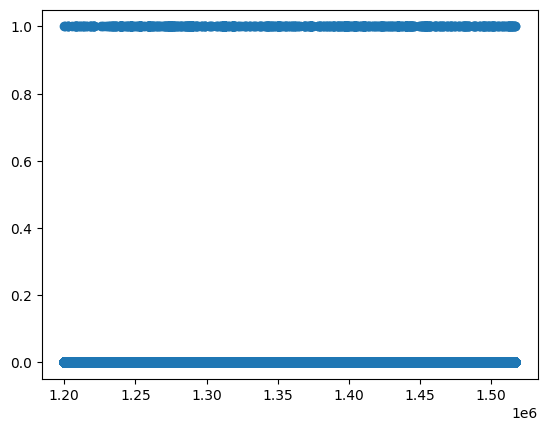

In [ ]:
plt.scatter(X[1200000:],Y[1200000:])

### **Model Training and Evaluation:**

The dataset is divided into training and testing sets to evaluate the model's performance accurately. During the training phase, the logistic regression model learns to classify anomalies as indicative of either a failure (1) or non-failure (0) scenario. Subsequently, the model's performance is assessed using various evaluation metrics such as accuracy, precision, recall and F1-score,  These metrics provide a comprehensive understanding of the model's predictive capabilities.



In [53]:
X_train = df[analogue_sensors][:1200000]
X_test = df[analogue_sensors][1200001:]
Y_train = Y[:1200000]
Y_test = Y[1200001:]

In [54]:
X_train

,TP2,TP3,H1,DV_pressure,Reservoirs,Motor_current,Oil_temperature
0,-0.424441,0.584247,0.531575,-0.209090,0.583993,-0.873208,-1.387941
1,-0.425056,0.568600,0.529175,-0.203860,0.568326,-0.873208,-1.376431
2,-0.424441,0.552953,0.526175,-0.203860,0.552660,-0.872122,-1.387941
3,-0.424441,0.537306,0.523175,-0.203860,0.536993,-0.873208,-1.414797
4,-0.424441,0.521659,0.520175,-0.203860,0.521327,-0.873208,-1.407124
...,...,...,...,...,...,...,...
1199995,-0.425056,-0.905360,0.247164,-0.203860,-0.910586,-0.872122,-0.440311
1199996,-0.423825,-0.927266,0.243563,-0.198629,-0.929386,-0.872122,-0.455657
1199997,-0.424441,-0.952301,0.238763,-0.198629,-0.957586,-0.872122,-0.467167
1199998,-0.424441,-0.977336,0.233963,-0.203860,-0.979519,-0.872122,-0.455657


In [55]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)


LogisticRegression()

In [56]:
Y_pred = logistic_model.predict(X_test)

In [63]:
# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)


In [60]:
print(accuracy)


0.9994352368061538


In [61]:
print(conf_matrix)


[[315578      5]
 [   174   1190]]


In [62]:
print(class_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    315583
         1.0       1.00      0.87      0.93      1364

    accuracy                           1.00    316947
   macro avg       1.00      0.94      0.96    316947
weighted avg       1.00      1.00      1.00    316947



### **Outcome and Impact:**

The successful development of this logistic regression model for failure prediction has several potential benefits for metro train operations. It can enhance proactive maintenance strategies by identifying potential failures before they occur, reduce downtime, improve passenger safety, and optimize resource allocation. By leveraging data-driven insights from sensor anomalies, metro operators can make informed decisions to ensure the continued reliability and safety of their systems.


## **2.1 Random Classifier for Failure Detaction**

In [64]:
# Initialize the Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=0)

# Fitting the model (Assuming X_train, Y_train, X_test, and Y_test are already defined)
random_forest_model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
class_report_rf = classification_report(Y_test, Y_pred_rf)

accuracy_rf, conf_matrix_rf, class_report_rf

(1.0,
 array([[315583,      0],
        [     0,   1364]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00    315583\n         1.0       1.00      1.00      1.00      1364\n\n    accuracy                           1.00    316947\n   macro avg       1.00      1.00      1.00    316947\nweighted avg       1.00      1.00      1.00    316947\n')

In [65]:
print(accuracy_rf)

1.0


In [66]:
print(conf_matrix_rf)

[[315583      0]
 [     0   1364]]


In [67]:
print(class_report_rf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    315583
         1.0       1.00      1.00      1.00      1364

    accuracy                           1.00    316947
   macro avg       1.00      1.00      1.00    316947
weighted avg       1.00      1.00      1.00    316947



## **Contribution**

> Arnish Satasiya (202001031) - Random Forest Model <br>
> Jay Kuvadiya (202001042) - Logistic Regression Model <br>
> Jenish Mangukiya (202001176) - Linear Regression Model (Motor_current) <br>
> Astha Shetty (202001260) - EDA and Preprocessing of Data <br>
> Deep Kanani (202001454) - Linear Regression Model (Oil_temprature) <br>



